In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [82]:
from scipy.stats import skew

In [83]:
from scipy.stats import norm

In [84]:
df = pd.read_csv("ecommerce_data.csv")

In [85]:
df.head()

,cust_id,gender,age,no_of_purchases,amount_spend,time_spent_on_site,cross_sell_conversion_rate
0,C0001,Male,36,4,400,41.02,0.597870
1,C0002,Male,42,4,360,49.42,0.087063
2,C0003,Male,40,2,60,35.78,0.441260
3,C0004,Female,33,3,240,39.17,0.553303
4,C0005,Male,24,6,120,63.42,0.860697


In [86]:
df.describe()

,age,no_of_purchases,amount_spend,time_spent_on_site,cross_sell_conversion_rate
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,33.418000,4.053000,238.230000,45.171110,0.428629
std,12.354186,1.965211,155.937435,16.666794,0.273603
min,18.000000,1.000000,20.000000,13.190000,0.000568
25%,23.000000,2.000000,120.000000,30.937500,0.204250
50%,30.000000,4.000000,200.000000,44.635000,0.387122
75%,41.000000,6.000000,320.000000,56.352500,0.605406
max,65.000000,8.000000,800.000000,92.530000,0.996979


In [124]:
df.isnull().sum()

cust_id                       0
gender                        0
age                           0
no_of_purchases               0
amount_spend                  0
time_spent_on_site            0
cross_sell_conversion_rate    0
dtype: int64

### 1. What is the range of the customer age in the dataset?
Hint: Difference between the maximum and minimum age


In [88]:
range_rqd = df["age"].max() - df["age"].min()

In [89]:
range_rqd

47

### Range of the customer age in the dataset = 47

### 2. Calculate the mean, median, and mode for the amount spent by customers. This will help in understanding the central tendencies of customer spending behavior

In [90]:
mean = df["amount_spend"].mean()
median = df["amount_spend"].median()
mode = df["amount_spend"].mode()[0]

In [91]:
print(f"mean = {mean}, median = {median}, mode = {mode}")

mean = 238.23, median = 200.0, mode = 240


### Mean, median, mode of amount spent by customers are 238.23, 200, 240 repectively.

### 3. Compute the variance and standard deviation for the time spent on site to analyze the variability in how much time customers spend on the website.


In [92]:
var = df["time_spent_on_site"].var()
sd = df["time_spent_on_site"].std()

In [93]:
print(f"variance={var:.2f}, standard_deviation={sd:.2f}")

variance=277.78, standard_deviation=16.67


### Variance and standard deviation for the time spent on site are 277.78 and 16.66 respectively

### 4. Calculate the interquartile range (IQR) for the amount spent by customers. This will help understand the spread of customer spending.
Hint: Difference between 75th percentile (Q3) and the 25th percentile (Q1)

In [94]:
Q1 = df["amount_spend"].quantile(0.25)
Q3 = df["amount_spend"].quantile(0.75)

In [95]:
IQR = Q3 - Q1

In [96]:
IQR

200.0

### 200 is interquartile range (IQR) for the amount spent by customers.

### 5. Is there any significant relationship between no.of purchases made and time spent on site? What is the correlation between the two?
Hint: Use the correlation coefficient

In [97]:
corr = df[["time_spent_on_site", "no_of_purchases"]].corr()

In [98]:
value = corr.loc["time_spent_on_site", "no_of_purchases"]
print(f"correlation_coef = {value:.2f}")

correlation_coef = 0.94


### Yes, there is a significant relationship between no.of purchases made and time spent on site, having a correlation coefficient of 0.937

### 6. How individual customer spending compares to the average. Calculate the z-score for a customer who spends $450. (A higher z-score indicates the customer is significantly above the average spending level, identifying them as a potential high-value customer.)
Hint: Use the z-score formula (z = (x-μ)/σ )

In [99]:
std_amount_spent =  df["amount_spend"].std()
mean_amount_spent =  df["amount_spend"].mean()

In [100]:
z = (450 - mean_amount_spent)/std_amount_spent

In [101]:
print(f"z values is {z:.2f}")

z values is 1.36


### The z-score for a customer who spends $450 is 1.35, so he spends more than the average.

### 7. Analyze the skewness of the distribution of the amount spent by customers. Is the data right-skewed or left-skewed?
Hint: Use the skewness measure to determine if the distribution has a long tail on the right
(right-skewed) or left (left-skewed).


In [102]:
print(df["amount_spend"].median(), df["amount_spend"].mean())

200.0 238.23


In [103]:
skewness = skew(df["amount_spend"])

In [104]:
print((int)(skewness>0))

1


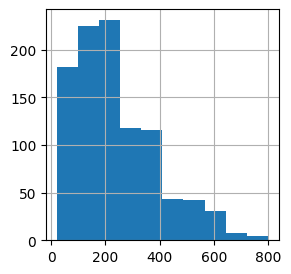

In [105]:
plt.figure(figsize = (3, 3))
df["amount_spend"].hist()
plt.show()

### As skewness is 0.95 the distribution is right skewed.

### 8. What is the probability that a randomly selected customer makes more than 5 purchases in a month or spends more than $300?
Hint: Use the addition rule


In [127]:
prob1 =df[df["no_of_purchases"]>5]["no_of_purchases"].count()/df.shape[0]

In [128]:
prob1

0.255

In [129]:
prob2 =df[df["amount_spend"]>300]["amount_spend"].count()/df.shape[0]

In [130]:
prob2

0.28

In [131]:
prob_and =df[(df["no_of_purchases"]>5) & (df["amount_spend"]>300)].shape[0]/df.shape[0]

In [132]:
prob3 = prob1 + prob2 - prob_and

In [133]:
prob3

0.396

### Probability that a randomly selected customer makes more than 5 purchases in a month or spends more than $300 is 0.396

### 9. Determine the 95% confidence interval for the amount spent by all customers. This will provide an estimate of the range in which the true average spending is likely to fall.
Hint: Calculate the mean and standard deviation, then use the z_critical and margin_of_error
to find the confidence interval.


In [135]:
std_amount_spent =  df["amount_spend"].std()
mean_amount_spent =  df["amount_spend"].mean()

In [136]:
n = df.shape[0]

In [137]:
z_critical = norm.ppf(0.975)

In [138]:
margin_of_error = z_critical * (std_amount_spent / np.sqrt(n))

In [139]:
ci_lower = mean_amount_spent - margin_of_error
ci_upper = mean_amount_spent + margin_of_error

In [140]:
print(f"95% Confidence Interval: ({ci_lower:.0f}, {ci_upper:.0f})")

95% Confidence Interval: (229, 248)


### 10.What is the probability that a customer who makes 5 or more purchases in a month will have a high cross-sell conversion rate (greater than 80%)?

In [147]:
prob_a = df[df["cross_sell_conversion_rate"] > 0.8]["cross_sell_conversion_rate"].shape[0]/df.shape[0]
prob_a

0.135

In [148]:
prob_b = df[df["no_of_purchases"] >= 5]["no_of_purchases"].shape[0]/df.shape[0]
prob_b

0.385

In [149]:
prob_a_and_b = df[(df["cross_sell_conversion_rate"] > 0.8) & (df["no_of_purchases"] > 5)].shape[0]/df.shape[0]
prob_a_and_b

0.135

In [150]:
prob_a_given_b = (prob_a_and_b)/prob_b

In [151]:
print(f"reqd_prob = {prob_a_given_b:.3f}")

reqd_prob = 0.351


### Probability that a customer who makes 5 or more purchases in a month will have a high cross-sell conversion rate (greater than 80%) is .53